## Feature selection using CMI

In [186]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [187]:
import pickle
import pandas as pd
import operator
import numpy as np
import scipy

In [188]:
with open(r"/content/gdrive/MyDrive/Notebooks Colab/featureMIs.pickle", "rb") as input_file:
    MI = pickle.load(input_file)
    
with open(r"/content/gdrive/MyDrive/Notebooks Colab/entropies.pickle", "rb") as input_file:
    entropy = pickle.load(input_file)
    
with open(r"/content/gdrive/MyDrive/Notebooks Colab/mutualInfos.pickle", "rb") as input_file:
    MI_target = pickle.load(input_file)
# del MI_target['HasDetections']

In [189]:
with open('/content/gdrive/MyDrive/Notebooks Colab/cleanDF.pickle', 'rb') as handle:
    malware = pickle.load(handle)

In [190]:
# Not in dictionaries of mutual info..
malware.drop('Wdft_RegionIdentifier',axis=1 ,inplace=True)

In [191]:
nums = ['Census_ProcessorCoreCount',
        'Census_PrimaryDiskTotalCapacity',
        'Census_SystemVolumeTotalCapacity',
        'Census_TotalPhysicalRAM',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches',
        'Census_InternalPrimaryDisplayResolutionHorizontal',
        'Census_InternalPrimaryDisplayResolutionVertical',
        'Census_InternalBatteryNumberOfCharges']
MI_cols = [col for col in malware.columns if col not in nums and col != 'MachineIdentifier' and col!='HasDetections']


categoricalColumns = list(malware.drop('HasDetections',axis=1).select_dtypes(include='category').columns)
numericalColumns = list(malware.drop('HasDetections',axis=1).select_dtypes(exclude='category').columns)

In [192]:
keys = [*MI]

In [193]:
#cleaning dictionaries. 
def delete_pairwise_key(col):
    try:
        keys_to_delete = list(map(lambda x: x.find(col+','),keys))
        keys_to_delete += list(map(lambda x: x.find(',',col),keys))
        for key in keys_to_delete:
            del MI[key]
    except:
        print("no keys to delete!")

keys = [*MI]
for col in MI_cols:
    if col not in categoricalColumns:
        del entropy[col]
        del MI_target[col]
        delete_pairwise_key(col)
        

no keys to delete!
no keys to delete!
no keys to delete!
no keys to delete!
no keys to delete!
no keys to delete!
no keys to delete!
no keys to delete!
no keys to delete!
no keys to delete!
no keys to delete!
no keys to delete!
no keys to delete!
no keys to delete!
no keys to delete!
no keys to delete!
no keys to delete!
no keys to delete!
no keys to delete!
no keys to delete!
no keys to delete!
no keys to delete!
no keys to delete!
no keys to delete!
no keys to delete!
no keys to delete!
no keys to delete!
no keys to delete!
no keys to delete!
no keys to delete!
no keys to delete!
no keys to delete!
no keys to delete!
no keys to delete!
no keys to delete!
no keys to delete!
no keys to delete!
no keys to delete!
no keys to delete!
no keys to delete!
no keys to delete!
no keys to delete!


## Forward selection algorithm (greedy feature selection)
Initialize set of selected variables $S={\emptyset}$ and $X$ the set of all variables being considered for analysis.

**Step 1.** *Selection of the first feature*

   Find feature $X^* \in X$ that maximizes $I(C,X_i)$;
   
   set $X = X\setminus \{X^*\}, S=\{X^*\}.$ Where $C$ is the target variable $C$.
   
**Step 2.** *greedy feature selection*

Find feature $X^+ \in X$ according to:

$$X^+ = \text{argmax}_{X_i\in X\setminus S}\left\{I(C,X_i) - \max_{X_s\in S}{CU_{X_i,X_s}I(C,X_s)}\right\}$$

Where $CU_{X_i,X_s}= \cfrac{I(X_i,X_s)}{H(X_s)}$

and finally, set $X = X\setminus \{X^+\}, S=S\cup\{X^+\}.$

**Step 3.** Go to step 2.

In [194]:
# utiliy functions
def get_MI(X_i,X_s):
    val = 0
    try:
        val =  MI[f"{X_i},{X_s}"]
    except:
        val =  MI[f"{X_s},{X_i}"]
    
    return val
def CU(X_i,X_s):
    '''
    X_i,X_s: labels of columns representing the variables, respectively.
    
    '''
    mi = get_MI(X_i,X_s)
    H  = entropy[X_s]
    
    return mi/H

In [240]:
Selected_features = []
features         = categoricalColumns

# step 1
Selected_features.append(max(MI_target.items(), key=operator.itemgetter(1))[0])

# step 2

def get_inner_max(X_i,Selected):
    max_val=-1e10
    for X_s in Selected:
        value = CU(X_i,X_s)*MI_target[X_s]
        if value >max_val:
            max_val = value
            
    return max_val

def get_next_var(Selected):
    best_var = None
    max_val  = -1e10
    for X_i in features:
        if X_i in Selected:
            continue
        value = MI_target[X_i] - get_inner_max(X_i,Selected)
        if value >max_val:
            max_val  = value
            best_var = X_i
    
    return best_var

In [268]:
def select_n_features(n):
    if len(features)==n:
        return features
    Selected_features = []
    Selected_features.append(max(MI_target.items(), key=operator.itemgetter(1))[0])
    #to define threshold
    criteria = True
    n_vars_selected =1
    while n_vars_selected <n:

        next_var = get_next_var(Selected_features)
        Selected_features.append(next_var)
        n_vars_selected+=1
    print("Features selected: ", n_vars_selected)
    return Selected_features

In [271]:
n =29
select_n_features(n)

Features selected:  29


['Census_SystemVolumeTotalCapacity',
 'Census_PowerPlatformRoleName',
 'Census_ChassisTypeName',
 'Census_InternalBatteryType',
 'SmartScreen',
 'AVProductsInstalled',
 'Processor',
 'RtpStateBitfield',
 'OsBuildLab',
 'AVProductsEnabled',
 'Census_MDC2FormFactor',
 'Census_OSArchitecture',
 'PuaMode',
 'Census_ProcessorClass',
 'UacLuaenable',
 'Census_DeviceFamily',
 'ProductName',
 'Platform',
 'Census_FlightRing',
 'Census_GenuineStateName',
 'Census_ProcessorManufacturerIdentifier',
 'Census_OSWUAutoUpdateOptionsName',
 'OsPlatformSubRelease',
 'Census_OSSkuName',
 'Census_OSEdition',
 'SkuEdition',
 'Census_ActivationChannel',
 'Census_OSBranch',
 'Census_PrimaryDiskTypeName']

# Preparing variables to input them into model


In [198]:
# X = malware.copy().drop('HasDetections', 1)
# y = malware.copy()['HasDetections']

for column in numericalColumns:
    if column == 'HasDetections':
        continue
    malware[column] = ((malware[column] - np.mean(malware[column])) / np.std(malware[column])).astype('float64')
# for column in numericalColumns:
#     X[column] = ((X[column] - np.mean(X[column])) / np.std(X[column])).astype('float64')

# xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.01, stratify=y, random_state=11)

# uniques = {}
# for column in categoricalColumns:
#     uniques[column] = X[column].unique()

# uniquesDF = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in uniques.items() ]))

# categoricalEncoder = OneHotEncoder(handle_unknown='ignore', dtype='uint8', sparse=True)
# categoricalEncoder.fit(uniquesDF.astype(str))

# xTestNumerical = xTest[numericalColumns].values
# xTestCategorical = xTest[categoricalColumns]
# xTestCategorical = categoricalEncoder.transform(xTestCategorical)
# xTest = np.concatenate([xTestNumerical, scipy.sparse.csr_matrix.toarray(xTestCategorical)], axis=1)
# del xTestNumerical
# del xTestCategorical
# del uniquesDF

In [221]:
# lightgbm for classification
import csv
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import re

# getting accuracy using the n best(according to CMI algorithm) along with the rest of the variables and accuracy 
# using complement of seleted features along the rest of the variables.
def get_acc(n, sample_size = 10000):
    #get best n features
    Selected_features = select_n_features(n)
    dropped_features  = list(set(categoricalColumns)-set(Selected_features))
    #using sample of dataframe
    malware_sample = malware.sample(sample_size)
    # malware_sample.drop('Census_InternalBatteryType', axis=1, inplace=True)
    # malware_sample.drop(list(set(features)-set(Selected_features)),axis=1, inplace=True)
    df = malware_sample.drop(dropped_features,axis=1)
    
    # define dataset
#     malware_d = pd.get_dummies(malware_sample,prefix=malware_sample.select_dtypes(include='category').columns.values)
#     malware_d = malware_d.rename(columns={'OsVer_10.0.48.0': 'OsVer_10.0.48.00'})
#     malware_d = malware_d.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

    X, y = df.drop('HasDetections',axis=1), df['HasDetections']
    
    # need to define the one-hot encoder everytime (?)
    uniques = {}
    for column in Selected_features:
        uniques[column] = X[column].unique()
    uniquesDF = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in uniques.items() ]))
    categoricalEncoder = OneHotEncoder(handle_unknown='ignore', dtype='uint8', sparse=True)
    categoricalEncoder.fit(uniquesDF.astype(str))
    
    XNumerical = X[numericalColumns].values
    XCategorical = X[Selected_features]
    XCategorical = categoricalEncoder.transform(XCategorical)
    X = np.concatenate([XNumerical, scipy.sparse.csr_matrix.toarray(XCategorical)], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    
    # evaluate the model
    model = LGBMClassifier(n_estimators = 100)
   
    # cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # n_scores_selected = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    # print('Accuracy: %.3f (%.3f)' % (mean(n_scores_selected), std(n_scores_selected)))
    # fit the model 
    model = LGBMClassifier()
    model.fit(X_train, y_train)
    # # make predictions
    yhat = model.predict(X_test)
    accuracy_on_test_selected = np.mean(yhat==y_test.values)
    print('accuracy on test: %f' % np.mean(yhat==y_test.values))
    
    
    df = malware_sample.drop(Selected_features,axis=1)
    
    # define dataset
#     malware_d = pd.get_dummies(malware_sample,prefix=malware_sample.select_dtypes(include='category').columns.values)
#     malware_d = malware_d.rename(columns={'OsVer_10.0.48.0': 'OsVer_10.0.48.00'})
#     malware_d = malware_d.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    
    X, y = df.drop('HasDetections',axis=1), df["HasDetections"]
    # need to define the one-hot encoder everytime (?)
    uniques = {}
    for column in dropped_features:
        uniques[column] = X[column].unique()
    uniquesDF = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in uniques.items() ]))
    categoricalEncoder = OneHotEncoder(handle_unknown='ignore', dtype='uint8', sparse=True)
    categoricalEncoder.fit(uniquesDF.astype(str))
                             
    XNumerical = X[numericalColumns].values
    XCategorical = X[dropped_features]
    XCategorical = categoricalEncoder.transform(XCategorical)
    X = np.concatenate([XNumerical, scipy.sparse.csr_matrix.toarray(XCategorical)], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    
    # # evaluate the model
    model = LGBMClassifier(n_estimators = 100)
    # cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # n_scores_dropped = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    # print('Accuracy: %.3f (%.3f)' % (mean(n_scores_dropped), std(n_scores_dropped)))
    # fit the model 
    model = LGBMClassifier()
    model.fit(X_train, y_train)
    # # make predictions
    yhat = model.predict(X_test)
    accuracy_on_test_dropped = np.mean(yhat==y_test.values)
    print('accuracy on test: %f' % np.mean(yhat==y_test.values))
    
    with open("/content/gdrive/MyDrive/Notebooks Colab/results_feature_selection.csv", "a") as f:
                             f.write(f"{n},{accuracy_on_test_selected},{accuracy_on_test_dropped}\n")

In [222]:
for i in range(len(features)):
    get_acc(i,sample_size=10000)

accuracy on test: 0.596000
accuracy on test: 0.620500
accuracy on test: 0.591500
accuracy on test: 0.616000
accuracy on test: 0.622000
accuracy on test: 0.603500
accuracy on test: 0.616500
accuracy on test: 0.604500
accuracy on test: 0.623000
accuracy on test: 0.597000
accuracy on test: 0.598500
accuracy on test: 0.578500
accuracy on test: 0.602500
accuracy on test: 0.584500
accuracy on test: 0.605000
accuracy on test: 0.592500
accuracy on test: 0.600000
accuracy on test: 0.588500
accuracy on test: 0.602000
accuracy on test: 0.597500
accuracy on test: 0.607500
accuracy on test: 0.610000
accuracy on test: 0.609500
accuracy on test: 0.590000
accuracy on test: 0.629500
accuracy on test: 0.580500
accuracy on test: 0.615000
accuracy on test: 0.600000
accuracy on test: 0.622500
accuracy on test: 0.591000
accuracy on test: 0.625500
accuracy on test: 0.618000
accuracy on test: 0.596000
accuracy on test: 0.597000
accuracy on test: 0.608500
accuracy on test: 0.611000
accuracy on test: 0.623500
a

In [223]:
import pandas as pd
import seaborn as sns
col_names = ['n_features', 'acc_selected','acc_dropped']
results_df = pd.read_csv("/content/gdrive/MyDrive/Notebooks Colab/results_feature_selection.csv",names=col_names)

results_df.head()

,n_features,acc_selected,acc_dropped
0,0,0.5960,0.6205
1,1,0.5915,0.6160
2,2,0.6220,0.6035
3,3,0.6165,0.6045
4,4,0.6230,0.5970


In [224]:
results_df.acc_dropped = results_df.acc_dropped.values[::-1]

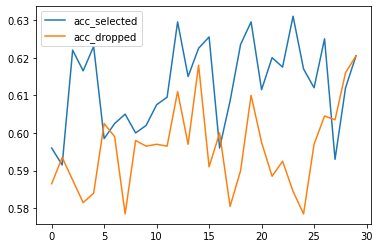

In [225]:
results_df[['acc_selected','acc_dropped']].plot()